In [33]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Task 1
import pandas as pd

file_path = 'NationalNames.csv'
data = pd.read_csv(file_path)

first_8_rows = data.head(8)
first_8_rows

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [35]:
# Task 2
last_8_rows = data.tail(8)
last_8_rows

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [36]:
# Task 3
column_names = data.columns
column_names

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [37]:
# Task 5
unique_names_count = data['Name'].nunique()
unique_names_count

93889

In [38]:
# Task 10
unique_names_per_year = data.groupby('Year')['Name'].nunique().reset_index()
unique_names_per_year

,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


In [39]:
# Task 11
result_df = pd.DataFrame({
    'Year': [data.groupby('Year')['Name'].nunique().idxmax()],
    'Names': [data.groupby('Year')['Name'].nunique().max()]
})

result_df

,Year,Names
0,2008,32488


In [40]:
# Task 12
most_popular_name_2008 = data[data['Year'] == 2008].groupby('Name')['Count'].sum().idxmax()
most_popular_name_2008

'Jacob'

In [41]:
# Task 13
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
year_jacob_female_most_popular = jacob_female.loc[jacob_female['Count'].idxmax()]

jacob_female_most_popular_df = pd.DataFrame({
    'Year': [year_jacob_female_most_popular['Year']],
    'Count': [year_jacob_female_most_popular['Count']]
})
jacob_female_most_popular_df

,Year,Count
0,2004,171


In [42]:
# Task 14
gender_counts = data.groupby(['Year', 'Name', 'Gender']).size().unstack().fillna(0)
gender_neutral_names = gender_counts[(gender_counts['F'] > 0) & (gender_counts['M'] > 0)]
gender_neutral_counts_per_year = gender_neutral_names.groupby('Year').size()
year_with_most_gender_neutral_names = gender_neutral_counts_per_year.idxmax()
max_gender_neutral_names = gender_neutral_counts_per_year.max()

gender_neutral_result_df = pd.DataFrame({
    'Year': [year_with_most_gender_neutral_names],
    'Neutral Names Count': [max_gender_neutral_names]
})

gender_neutral_result_df

,Year,Neutral Names Count
0,2008,2557


In [43]:
# Task 15
total_births_per_year = data.groupby('Year')['Count'].sum().reset_index()
total_births_per_year.columns = ['Year', 'Total Births']
total_births_per_year

,Year,Total Births
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467
...,...,...
130,2010,3686589
131,2011,3646730
132,2012,3643336
133,2013,3626802


In [44]:
# Task 16
year_with_most_births = int(data.groupby('Year')['Count'].sum().idxmax())
year_with_most_births

1957

In [45]:
# Task 17
gender_births_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack().reset_index()
gender_births_per_year.columns = ['Year', 'Boys', 'Girls']
gender_births_per_year

,Year,Boys,Girls
0,1880,90993,110491
1,1881,91954,100745
2,1882,107850,113688
3,1883,112321,104629
4,1884,129022,114445
...,...,...,...
130,2010,1772738,1913851
131,2011,1753500,1893230
132,2012,1753922,1889414
133,2013,1745339,1881463


In [46]:
# Task 18

gender_births_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_girls_than_boys = gender_births_per_year[gender_births_per_year['F'] > gender_births_per_year['M']]
count_years_more_girls_than_boys = years_more_girls_than_boys.shape[0]
count_years_more_girls_than_boys

54

In [47]:
# Task 21
boys_named_barbara_count = int(data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum())
boys_named_barbara_count

4139

In [48]:
# Task 22
years_observed = data['Year'].nunique()
years_observed

135

In [49]:
# Task 23
total_years = data['Year'].nunique()
gender_counts = data.groupby(['Year', 'Name', 'Gender']).size().unstack().fillna(0)
gender_neutral_all_years = gender_counts[(gender_counts['M'] > 0) & (gender_counts['F'] > 0)]
most_popular_gender_neutral_names = gender_neutral_all_years.groupby('Name').sum().sum(axis=1).sort_values(ascending=False).reset_index()
most_popular_gender_neutral_names

,Name,0
0,Francis,270.0
1,Ollie,270.0
2,Marion,270.0
3,Leslie,270.0
4,James,270.0
...,...,...
8909,Zikora,2.0
8910,Ziggy,2.0
8911,Ziel,2.0
8912,Abigayle,2.0


In [50]:
# Task 24
name_counts = data.groupby('Name')['Count'].sum()
threshold = name_counts.quantile(0.25)
unpopular_names = name_counts[name_counts <= threshold]
most_popular_among_unpopular = unpopular_names.idxmax()
most_popular_among_unpopular_count = unpopular_names.max()

most_popular_unpopular_name_df = pd.DataFrame({
    'Name': [most_popular_among_unpopular],
    'Count': [most_popular_among_unpopular_count]
})

most_popular_unpopular_name_df

,Name,Count
0,Aadison,11


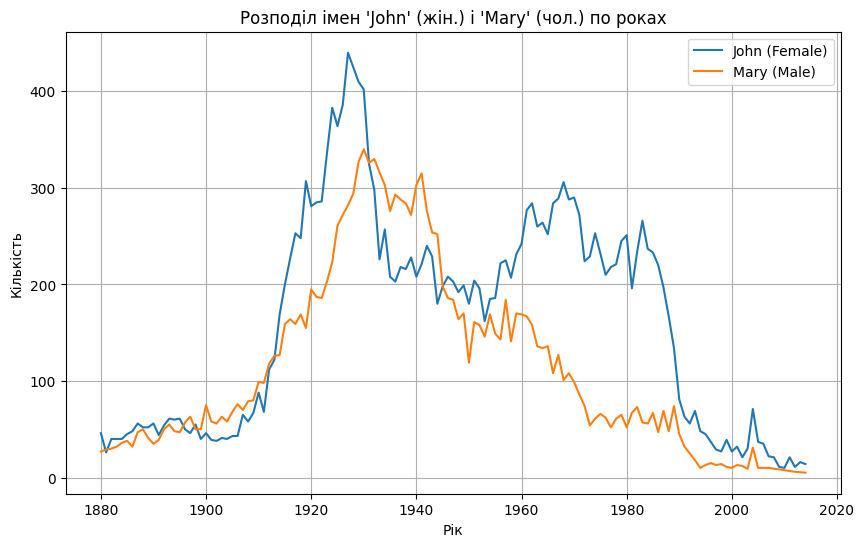

In [51]:
# Task 26
import matplotlib.pyplot as plt

john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]

plt.figure(figsize=(10, 6))
plt.plot(john_female['Year'], john_female['Count'], label="John (Female)")
plt.plot(mary_male['Year'], mary_male['Count'], label="Mary (Male)")
plt.title("Розподіл імен 'John' (жін.) і 'Mary' (чол.) по роках")
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()